### Tidy-up metadata, modify Braun Age, and save adata as new file (`Output_231215_adata_scvi_random_sampleID.h5ad`)

In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [2]:
adata = sc.read_h5ad("Data/Output_231123_adata_scvi_random_sampleID_annot.h5ad") # 10m

In [3]:
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit', 'cluster_number', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

### Add metadata

In [4]:
meta = pd.read_csv('Table/metadata_adata_edit.csv', index_col="X")
meta

/home/ssun1116/anaconda3/envs/BrainAtlas/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (7,13,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,batch,sampleID,Age,Assay,Stage,Race,PMI,Hemisphere,Library,Brain_Region,...,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_scores,predicted_doublets,X_scvi_batch,X_scvi_labels,leiden_scvi,Leiden
X,,,,,,,,,,,,,,,,,,,,,
10X119_2:TCGTACCCAGACAAAT,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,1655,2912,51,1.751374,0.062907,False,10,0,RG Fetal WNT1 (C3),C3
10X119_2:AGAGCGACACCGCTAG,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,1754,3560,42,1.179775,0.035176,False,10,0,RG Fetal WNT1 (C3),C3
10X119_2:AAGGAGCGTTGAGTTC,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,1680,3095,18,0.581583,0.035176,False,10,0,Neuroblast Fetal HMX2 (C4),C4
10X119_2:ATAGACCAGGGTGTTG,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,3000,7073,144,2.035911,0.027778,False,10,0,RG Fetal WNT1 (C3),C3
10X119_2:TTAGGCATCCGAACGC,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,1826,3307,33,0.997883,0.078049,False,10,0,RG Fetal WNT1 (C3),C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsDG99HC_TTTGTTGGTTCATCTT-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,1903,3639,1,0.027480,0.011442,False,112,0,Micro TYROBP DOCK8 (C12),C12
hsDG99HC_TTTGTTGTCATCTATC-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,2363,5301,9,0.169779,0.127273,False,112,0,Oligo OPALIN LINC01792 (C0),C0
hsDG99HC_TTTGTTGTCCTCGATC-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,1030,2850,18,0.631579,0.022517,False,112,0,Exc LINC00507 FAM163A (C1),C1


In [5]:
adata.obs = meta

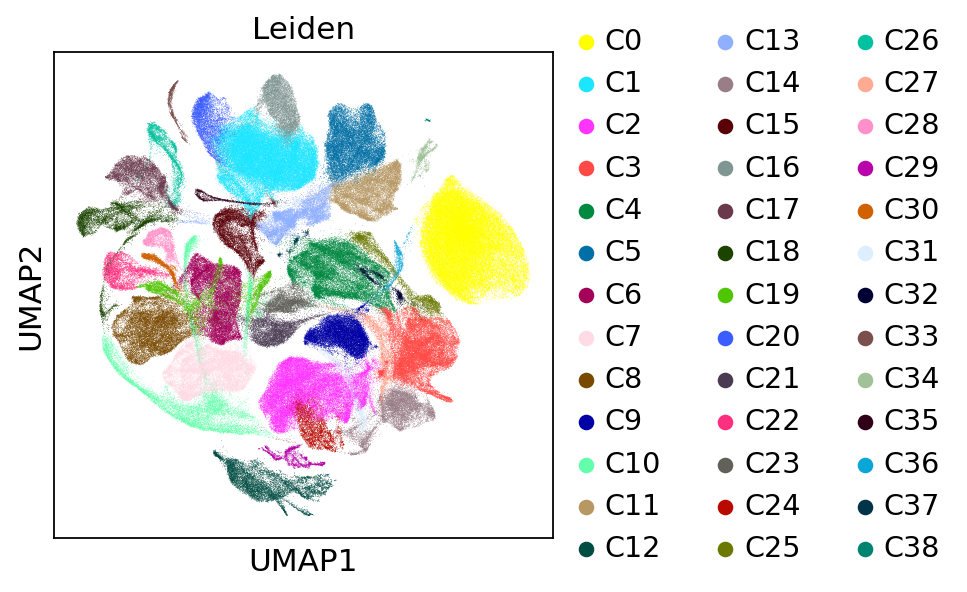

In [6]:
sc.pl.umap(adata, color = "Leiden")

In [7]:
adata.obs["PMI"] = adata.obs["PMI"].astype(str)
adata.obs["predicted_doublets"] = adata.obs["predicted_doublets"].astype(str)

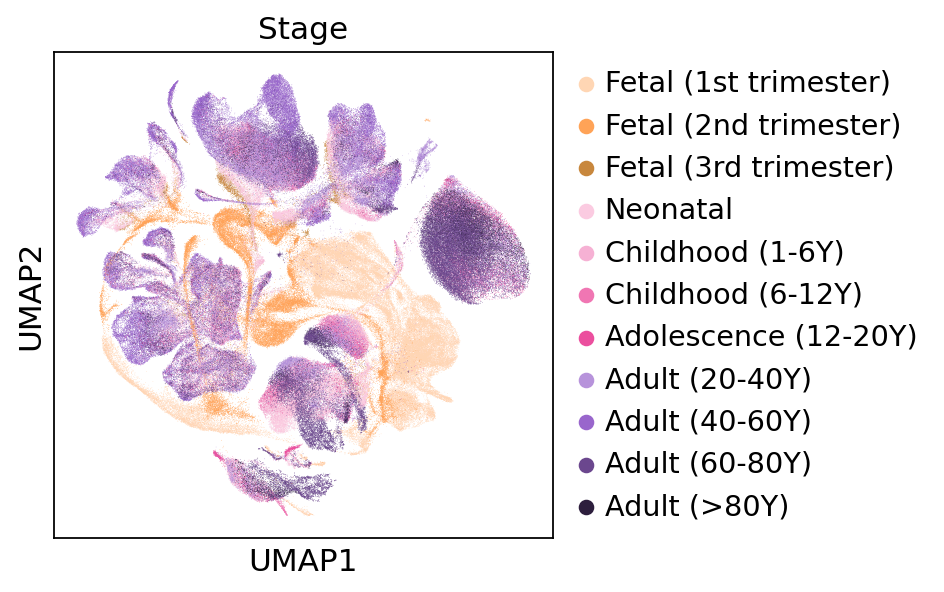

In [8]:
sc.set_figure_params(vector_friendly=True)
col_dict_stage = {'Fetal (1st trimester)': '#ffd6b4',
            'Fetal (2nd trimester)': '#ffa357',
            'Fetal (3rd trimester)': '#c8873d',
            'Neonatal': '#fbcbe1',
            'Childhood (1-6Y)': '#f6b1d4',
            'Childhood (6-12Y)': '#f076b3',
            'Adolescence (12-20Y)': '#eb4f9e',
            'Adult (20-40Y)': '#b793db',
            'Adult (40-60Y)': '#9966cc',
            'Adult (60-80Y)': '#6b478e',
            'Adult (>80Y)': '#2d1e3d'}

adata.obs['Stage'] = pd.Categorical(adata.obs['Stage'], categories=col_dict_stage.keys(), ordered=True)

sc.pl.umap(adata, color='Stage', palette=col_dict_stage)

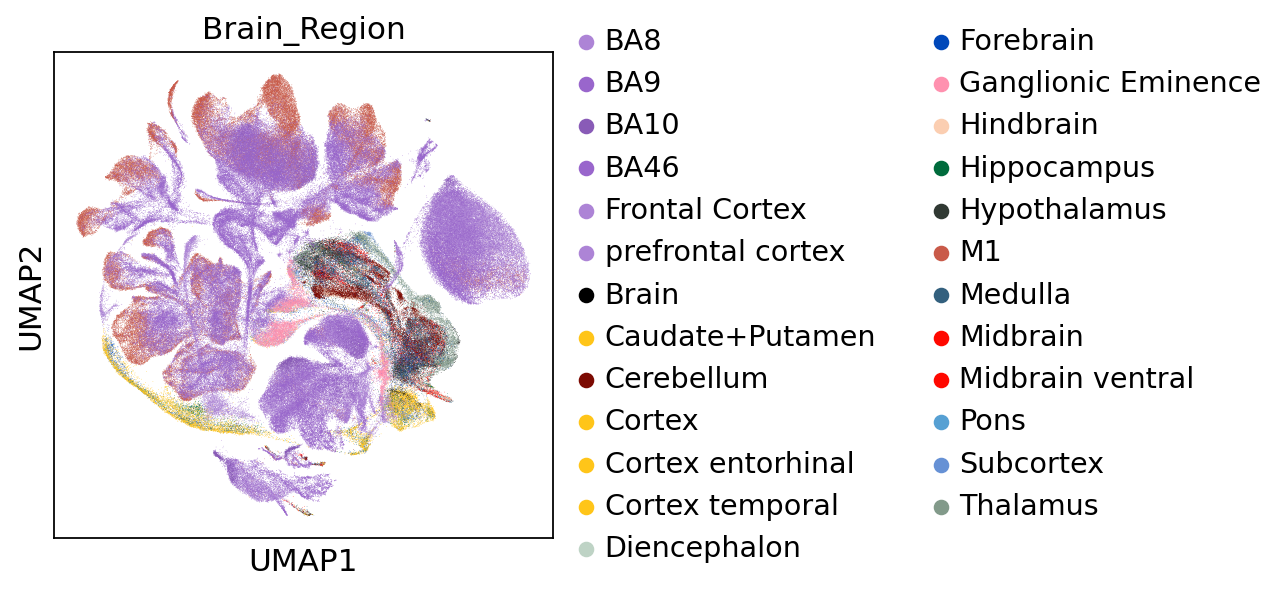

In [9]:
order_dict = {
    "BA8": 1,
    "BA9": 2,
    "BA10": 3,
    "BA46": 4,
    "Frontal Cortex": 5,
    "prefrontal cortex": 6,
    "Brain": 7,
    "Caudate+Putamen": 8,
    "Cerebellum": 9,
    "Cortex": 10,
    "Cortex entorhinal": 11,
    "Cortex temporal": 12,
    "Diencephalon": 13,
    "Forebrain": 14,
    "Ganglionic Eminence": 15,
    "Hindbrain": 16,
    "Hippocampus": 17,
    "Hypothalamus": 18,
    "M1": 19,
    "Medulla": 20,
    "Midbrain": 21,
    "Midbrain ventral": 22,
    "Pons": 23,
    "Subcortex": 24,
    "Thalamus": 25
}

# Use the order_dict to create a Categorical column
adata.obs['Brain_Region'] = pd.Categorical(adata.obs['Brain_Region'], categories=order_dict.keys(),  ordered=True)

sc.pl.umap(adata, color='Brain_Region')

In [10]:
adata.write_h5ad("Data/Output_231215_adata_scvi_random_sampleID.h5ad") # 10m